Multi-layer Perceptron Regressor (MLPRegressor) - MLP também pode ser usado para resolver problemas de regressão. Para este exemplo foi utilizado o conjunto de dados House Sales em King County, EUA, da plataforma “Kaggle” (https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

In [189]:
from sklearn.model_selection import train_test_split # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPRegressor # Biblioteca para utilização do Regressor MLP
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Biblioteca utilizada para normalização dos dados
from sklearn.pipeline import Pipeline # Biblioteca para organização de ações em sequência
from sklearn import metrics # Biblioteca para avaliação das métricas no modelo
import matplotlib.pyplot as plt # Para visualizacao dos dados por meio de gráfico
import numpy as np # Biblioteca de manipulação de arrays Numpy
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset
import seaborn as sns # Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib.

Carregamento e Organização Inicial do Dataset  (Artigo sobre mais informações do seaborn (sns): https://medium.com/@bernardolago/gr%C3%A1ficos-usando-seaborn-61f7d23481cf)

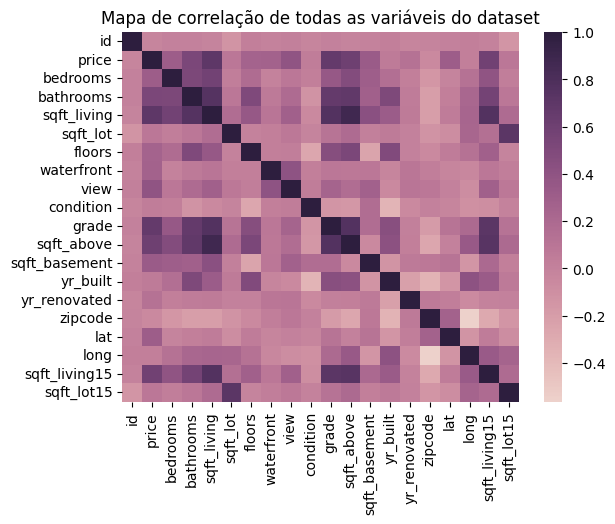

In [190]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("kc_house_data.csv") # Carregamento do dataset via Pandas

# Gera um gráfico matricial para apresentar a correção entre as variáveis de entrada do dataset
ax = sns.heatmap(df.corr(numeric_only=True), annot=False, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set_title('Mapa de correlação de todas as variáveis do dataset')
ax=ax

In [191]:
# Exclusão das variáveis não relevantes do dataset
df = df.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'], axis=1)
# Exibe as 5 primeiras amostras
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503


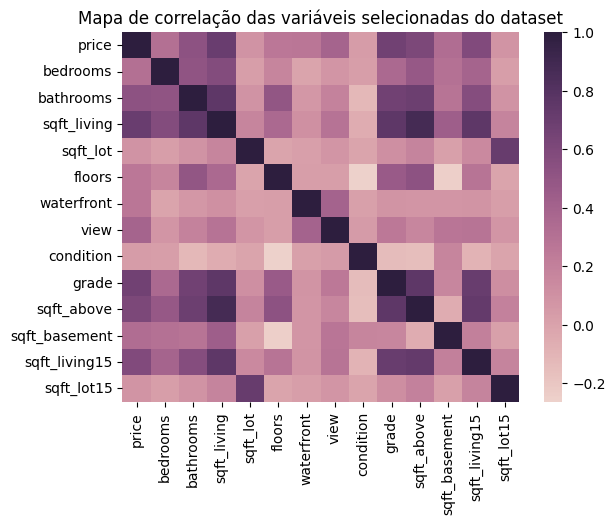

In [192]:
bx = sns.heatmap(df.corr(numeric_only=True), annot=False, cmap=sns.cubehelix_palette(as_cmap=True))
bx.set_title('Mapa de correlação das variáveis selecionadas do dataset')
bx=bx

Pré-Processamento dos Dados

StandardScaler() - Uso da distribuição normal e, portanto, transforma cada valor nos dados de forma que a média dos dados padronizados seja zero e o desvio padrão seja igual a um. Essa transformação garante que os dados estejam em uma escala comum, o que é útil para muitos algoritmos de aprendizado de máquina, especialmente aqueles que são sensíveis à escala dos atributos.
O objetivo de utilizar dessa distribuição para Machine Learning é de simplificar o processo de reconhecimento dos dados pela máquina evitando problemas como Bias (algoritmo enviesado), além de prevenir falhas de sobreajuste e subajuste (quando o modelo se ajusta demais aos dados e não generaliza adequadamente aos novos dados ou quando ele não se ajusta bem aos dados, respectivamente)

In [193]:
x = df.drop('price', axis=1) # Exclusão da variável price das entradas
y = df['price'] # Inclusão da variável price no vetor de saídas desejadas
maxY = y.max()
y = y/maxY
print(maxY)

7700000.0


In [194]:
# Padronização de dados (https://sigmoidal.ai/guia-basico-de-pre-processamento-de-dados/ - https://cursos.alura.com.br/forum/topico-sobre-o-standardscaler-184181)
scaler = StandardScaler().fit(x) # Cria o modelo para o ajuste
x = scaler.transform(x) # Aplica a padronização no dataset de treinamento baseado nos dados de treinamento

trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.30) # Separação do dataset em amostras para treino e teste, considerando 30% dos valores para teste

"""
Observação: Importante estes passos inclusive em modo de produção no qual novos dados serão apresentados ao modelo neural e que talvez
não se conheça a resposta desejada
"""

'\nObservação: Importante estes passos inclusive em modo de produção no qual novos dados serão apresentados ao modelo neural e que talvez\nnão se conheça a resposta desejada\n'

Aplicação do MLPRegressor

In [ ]:
"""
As explicações dos parâmetros de configurações do MLPRegressor podem ser obtidos no link
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
"""
mlp_reg = MLPRegressor(hidden_layer_sizes=(50), activation='relu', solver='adam',
                       max_iter=5000, tol=0.0000001, momentum=0.8, early_stopping=True, epsilon=1e-8,
                       n_iter_no_change=10, random_state=12)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg.fit(trainX, trainY)

print(mlp_reg.n_outputs_)

1


Avaliação do Modelo

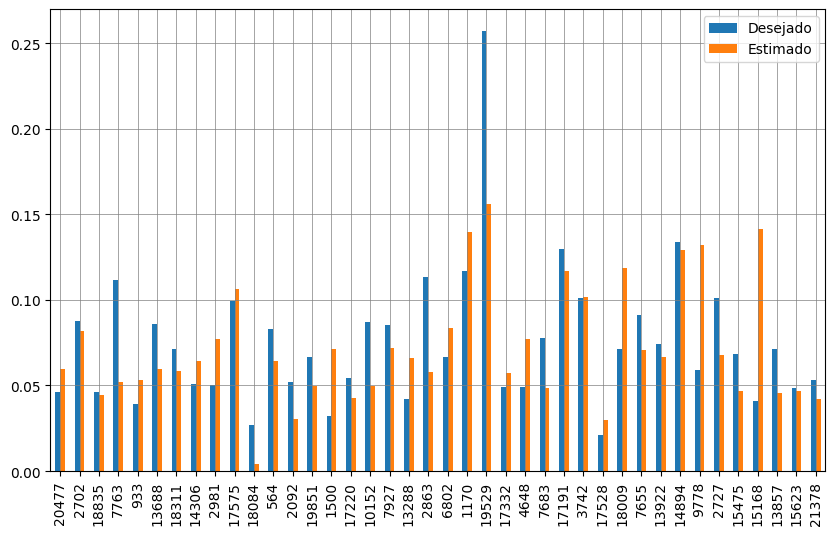

In [196]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(40) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Avaliação do Erro no Processo de Treinamento

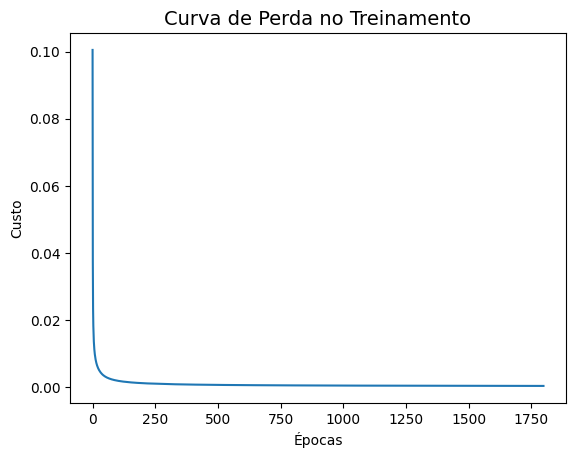

In [197]:
plt.plot(mlp_reg.loss_curve_) # Plotando o gráfico de erros no processo de treinamento
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

Resumo das Métricas
Links de Referência:
- https://michael-fuchs-python.netlify.app/2019/06/30/metrics-for-regression-analysis/
- https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96

In [198]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.root_mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2: ', metrics.r2_score(testY, y_pred)) # Apresenta o R2 Score - Representa quanto o modelo está prevendo corretamente, tem uma variação de 0 a 1. Caso seja obtido pelo modelo o R2 = 1, pode ser afirmado que os dados tem relação linear de 100%.

Mean Absolute Error (MAE): 0.021510188610715204
Mean Squared Error (MSE): 0.0009989486462028585
Root Mean Squared Error (RMSE): 0.03160614886699831
Mean Absolute Percentage Error (MAPE): 0.3440767642324075
R2:  0.5772358202675147
